In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys 

In [2]:
green_data_origin=pd.read_csv('green_tripdata_2015-09.csv',sep=',')
yellow_data_origin=pd.read_csv('yellow_tripdata_2015-09.csv',sep=',')
green_data_origin.columns=['VendorID','lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag',
                           'RateCodeID','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude',
                           'Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tip_amount','Tolls_amount',
                           'Ehail_fee','improvement_surcharge','Total_amount','Payment_type','Trip_type ']
yellow_data_origin.columns=['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
                           'pickup_longitude','pickup_latitude','RatecodeID','store_and_fwd_flag','dropoff_longitude',
                           'dropoff_latitude','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                           'improvement_surcharge','total_amount']

# Question1

In [3]:
green_data_origin.info()
print('\n')
yellow_data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048575 non-null  int64  
 1   lpep_pickup_datetime   1048575 non-null  object 
 2   Lpep_dropoff_datetime  1048575 non-null  object 
 3   Store_and_fwd_flag     1048575 non-null  object 
 4   RateCodeID             1048575 non-null  int64  
 5   Pickup_longitude       1048575 non-null  float64
 6   Pickup_latitude        1048575 non-null  float64
 7   Dropoff_longitude      1048575 non-null  float64
 8   Dropoff_latitude       1048575 non-null  float64
 9   Passenger_count        1048575 non-null  int64  
 10  Trip_distance          1048575 non-null  float64
 11  Fare_amount            1048575 non-null  float64
 12  Extra                  1048575 non-null  float64
 13  MTA_tax                1048575 non-null  float64
 14  Tip_amount        

# Question2

In [4]:
green_distance= green_data_origin['Trip_distance']
yellow_distance= yellow_data_origin['trip_distance']

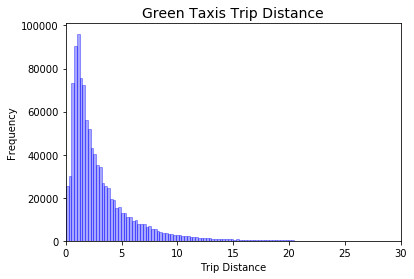

In [5]:
## Green Taxis Trip Distance graph
from matplotlib.pyplot import MultipleLocator
plt.hist(green_distance,bins=1000,facecolor='blue', edgecolor='blue',alpha=0.35)
plt.title('Green Taxis Trip Distance',fontsize=14)
plt.xlabel('Trip Distance',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.xlim(0,30)
plt.show()


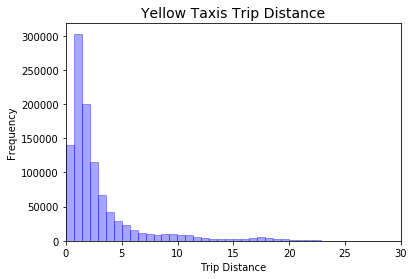

In [6]:
## Yellow Taxis Trip Distance graph
plt.hist(yellow_distance,bins=1000,facecolor='blue', edgecolor='blue',alpha=0.35)
plt.title('Yellow Taxis Trip Distance',fontsize=14)
plt.xlabel('Trip Distance',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.xlim(0,30)
plt.show()

# Question3

In [7]:
##Question3
import statistics
##Green Part
green_date=green_data_origin['lpep_pickup_datetime']

green_date.columns=['lpep_pickup_datetime']
green_date = np.array(green_date)
green_date = pd.to_datetime(green_date) 
green_date_period = green_date.to_period('H')

green_groupbyhour=[]
sum_distance = 0

for i in range(1048574):
    if (green_date_period[i]==green_date_period[i+1]):
        sum_distance += green_distance[i]
    else:
        sum_distance += green_distance[i]
        green_groupbyhour.append(sum_distance)
        sum_distance=0

print('The mean of the trip distance of Green Taxis: ',np.mean(green_groupbyhour))
print('The median of the trip distance of Green Taxis: ',statistics.median(green_groupbyhour))

The mean of the trip distance of Green Taxis:  6328.302096774193
The median of the trip distance of Green Taxis:  6366.090000000007


In [8]:
##Yellow Part
yellow_date=yellow_data_origin['tpep_pickup_datetime']

yellow_date.columns=['tpep_pickup_datetime']
yellow_date = np.array(yellow_date)
yellow_date = pd.to_datetime(yellow_date) 

yellow_date_period = yellow_date.to_period('H')


yellow_groupbyhour=[]
sum = 0

for i in range(1048574):
    if (yellow_date_period[i]==yellow_date_period[i+1]):
        sum += yellow_distance[i]
    else:
        sum += yellow_distance[i]
        yellow_groupbyhour.append(sum)
        sum=0
print('The mean of the trip distance of Yellow Taxis: ',np.mean(yellow_groupbyhour))
print('The median of the trip distance of Yellow Taxis: ',statistics.median(yellow_groupbyhour))

The mean of the trip distance of Yellow Taxis:  1906.92719080174
The median of the trip distance of Yellow Taxis:  626.9800000000001


In [9]:
#sort out green part
green_pickup_long_data=green_data_origin['Pickup_longitude']
green_pickup_lati_data=green_data_origin['Pickup_latitude']
green_dropoff_long_data=green_data_origin['Dropoff_longitude']
green_dropoff_lati_data=green_data_origin['Dropoff_latitude']
green_airport_number=[]
## Pickup from airport
for i in range(len(green_pickup_long_data)):
    if (round(green_pickup_long_data[i],2)== -73.78 and round(green_pickup_lati_data[i],2)==40.64):##JFK Airport
        green_airport_number.append(i)
    elif (round(green_pickup_long_data[i],2)== -74.17 and round(green_pickup_lati_data[i],2)==40.69):##EWR Airport
        green_airport_number.append(i)
    elif (round(green_pickup_long_data[i],2)== -73.87 and round(green_pickup_lati_data[i],2)==40.78):##LGA Airport
        green_airport_number.append(i)
    else:
        continue
## Dropoff from airport
for i in range(len(green_dropoff_long_data)):
    if (round(green_dropoff_long_data[i],2)== -73.78 and round(green_dropoff_lati_data[i],2)==40.64):##JFK Airport
        green_airport_number.append(i)
    elif (round(green_dropoff_long_data[i],2)== -74.17 and round(green_dropoff_lati_data[i],2)==40.69):##EWR Airport
        green_airport_number.append(i)
    elif (round(green_dropoff_long_data[i],2)== -73.87 and round(green_dropoff_lati_data[i],2)==40.78):##LGA Airport
        green_airport_number.append(i)
    else:
        continue
        
# output the green data as a matrix   
from numpy import mat
green_data_origin_array=np.array(green_data_origin)
green_airport_data=[]
for i in green_airport_number:
    green_airport_data.append(green_data_origin_array[i])
green_airport_data=mat(green_airport_data)
print('The transactions of the person originate or terminate at one of the NYC area airports is :' ,
      green_airport_data.size)
green_total_amount=green_data_origin['Total_amount']

print('The average fair of the person originate or terminate at one of the NYC area airports is: ',round(np.mean(green_total_amount),2))

The transactions of the person originate or terminate at one of the NYC area airports is : 62265
The average fair of the person originate or terminate at one of the NYC area airports is:  15.14


In [10]:
#sort out yellow part
yellow_pickup_long_data=yellow_data_origin['pickup_longitude']
yellow_pickup_lati_data=yellow_data_origin['pickup_latitude']
yellow_dropoff_long_data=yellow_data_origin['dropoff_longitude']
yellow_dropoff_lati_data=yellow_data_origin['dropoff_latitude']
yellow_airport_number=[]
## Pickup from airport
for i in range(len(yellow_pickup_long_data)):
    if (round(yellow_pickup_long_data[i],2)== -73.78 and round(yellow_pickup_lati_data[i],2)==40.64):##JFK Airport
        yellow_airport_number.append(i)
    elif (round(yellow_pickup_long_data[i],2)== -74.17 and round(yellow_pickup_lati_data[i],2)==40.69):##EWR Airport
        yellow_airport_number.append(i)
    elif (round(yellow_pickup_long_data[i],2)== -73.87 and round(yellow_pickup_lati_data[i],2)==40.78):##LGA Airport
        yellow_airport_number.append(i)
    else:
        continue
## Dropoff from airport
for i in range(len(yellow_dropoff_long_data)):
    if (round(yellow_dropoff_long_data[i],2)== -73.78 and round(yellow_dropoff_lati_data[i],2)==40.64):##JFK Airport
        yellow_airport_number.append(i)
    elif (round(yellow_dropoff_long_data[i],2)== -74.17 and round(yellow_dropoff_lati_data[i],2)==40.69):##EWR Airport
        yellow_airport_number.append(i)
    elif (round(yellow_dropoff_long_data[i],2)== -73.87 and round(yellow_dropoff_lati_data[i],2)==40.78):##LGA Airport
        yellow_airport_number.append(i)
    else:
        continue
        
# output the yellow data as a matrix   
from numpy import mat
yellow_data_origin_array=np.array(yellow_data_origin)
yellow_airport_data=[]
for i in yellow_airport_number:
    yellow_airport_data.append(yellow_data_origin_array[i])
yellow_airport_data=mat(yellow_airport_data)
print('The transactions of the person originate or terminate at one of the NYC area airports is :' ,
      yellow_airport_data.size)
yellow_total_amount=yellow_data_origin['total_amount']
print('The average fair of the person originate or terminate at one of the NYC area airports is: ',round(np.mean(yellow_total_amount),2))





The transactions of the person originate or terminate at one of the NYC area airports is : 187891
The average fair of the person originate or terminate at one of the NYC area airports is:  16.1


In [11]:
##output yellow data
green_name=['VendorID','lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag',
        'RateCodeID','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude',
        'Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tip_amount','Tolls_amount',
        'Ehail_fee','improvement_surcharge','Total_amount','Payment_type','Trip_type ']
output_green=pd.DataFrame(columns=green_name,data=green_airport_data)
output_green.to_csv('green_airport_data.csv',encoding='gbk')


## output yellow data
yellow_name=['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
        'pickup_longitude','pickup_latitude','RatecodeID','store_and_fwd_flag','dropoff_longitude',
        'dropoff_latitude','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
        'improvement_surcharge','total_amount']
output_yellow=pd.DataFrame(columns=yellow_name,data=yellow_airport_data)
output_yellow.to_csv('yellow_airport_data.csv',encoding='gbk')

# Question4

# Green Part

In [12]:
## Question4
##green percent
green_tip_data=green_data_origin['Tip_amount']
green_total_amount=green_data_origin['Total_amount']
green_percent=[]

for i in range(len(green_tip_data)):
    if (green_total_amount[i]==0):
        percent=0
    else:
        percent=green_tip_data[i]/green_total_amount[i]
    green_percent.append(percent)
    
##yellow percent
yellow_tip_data=yellow_data_origin['tip_amount']
yellow_total_amount=yellow_data_origin['total_amount']
yellow_percent=[]

for i in range(len(yellow_tip_data)):
    if (yellow_total_amount[i]==0):
        percent=0
    else:
        percent=yellow_tip_data[i]/yellow_total_amount[i]
    yellow_percent.append(percent)


In [13]:
#Linear model AND Decision Tree in Green part
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

##Linear 
X = green_data_origin[['Passenger_count','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude',
                       'Trip_distance','Fare_amount','Extra','MTA_tax','Tolls_amount', 'improvement_surcharge',
                       'Payment_type','Trip_type ']]
y = pd.DataFrame(green_percent)
X=X.fillna(0)
y=y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## standardize the X_
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train,y_train)

## predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


## linear actuarcy
print('The R2 training of Linear part is: ', lr.score(X_train, y_train))
print('The R2 testing of Linear part is: ', lr.score(X_test, y_test))



The R2 training of Linear part is:  0.6052761325284421
The R2 testing of Linear part is:  0.6060846400227172


In [14]:
##Decision Tree
max_d=np.linspace(1,20,num = 20)
param_dist = {"max_depth": max_d,
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

# Fit it to the data
tree_cv.fit(X_train,y_train.astype('int'))

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 7.0, 'max_features': 5, 'min_samples_leaf': 3}
Best score is 0.9999690055551582


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
best_dt = DecisionTreeClassifier(criterion='gini',max_depth=18.0,min_samples_leaf=6, min_samples_split=2)
best_dt.fit(X_train,y_train.astype('int'))
y_pred=best_dt.predict(X_test)
accuracy = accuracy_score(y_pred, y_test.astype('int')) 
print('{:s} : {:.3f}'.format("DecisionTree Accuracy", accuracy)) 

DecisionTree Accuracy : 1.000


# Yellow Part

In [16]:
#Linear model AND Decision Tree in yellow part

X = yellow_data_origin[['passenger_count','trip_distance','fare_amount','extra','mta_tax','tolls_amount',
                        'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
                        'improvement_surcharge','payment_type']]
y = pd.DataFrame(yellow_percent)
X=X.fillna(0)
y=y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## standardize the X_
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train,y_train)

## predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


## linear actuarcy

print('The R2 training of Linear part is: ', lr.score(X_train, y_train))
print('The R2 testing of Linear part is: ', lr.score(X_test, y_test))


The R2 training of Linear part is:  0.7390916835852986
The R2 testing of Linear part is:  0.7338298721430357


In [17]:
##Decision Tree
max_d=np.linspace(1,20,num = 20)
param_dist = {"max_depth": max_d,
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

# Fit it to the data
tree_cv.fit(X_train,y_train.astype('int'))

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 11.0, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 1.0


In [18]:
best_dt = DecisionTreeClassifier(criterion='entropy',max_depth=19.0,max_features=6,min_samples_leaf=6)
best_dt.fit(X_train,y_train.astype('int'))
y_pred=best_dt.predict(X_test)
accuracy = accuracy_score(y_pred, y_test.astype('int')) 
print('{:s} : {:.3f}'.format("DecisionTree Accuracy", accuracy)) 

DecisionTree Accuracy : 1.000


## Question5

In [19]:
import statistics
import random
##Green Part
green_distance= green_data_origin['Trip_distance']
green_date=green_data_origin['lpep_pickup_datetime']

green_date.columns=['lpep_pickup_datetime']
green_date = np.array(green_date)
green_date = pd.to_datetime(green_date) 
green_date_period = green_date.to_period('W')

green_groupbyhour=[]
week1=[]
week2=[]
week3=[]
week4=[]


for i in range(1048574):
    if (green_date_period[i]==green_date_period[1]):
        week1.append(green_distance[i])
    elif (green_date_period[i]==green_date_period[300000]):
        week2.append(green_distance[i])
    elif (green_date_period[i]==green_date_period[700000]):
        week3.append(green_distance[i])
    else:
        week4.append(green_distance[i])
week1 = random.sample(week1, 10000)
week2 = random.sample(week2, 10000)
week3 = random.sample(week3, 10000)
week4 = random.sample(week4, 10000)


In [20]:
from scipy.stats import ttest_ind
score=[]
score.append(ttest_ind(week1,week2).pvalue)
score.append(ttest_ind(week1,week3).pvalue)
score.append(ttest_ind(week1,week4).pvalue)
score.append(ttest_ind(week2,week3).pvalue)
score.append(ttest_ind(week2,week4).pvalue)
score.append(ttest_ind(week3,week4).pvalue)
print(ttest_ind(week3,week4).pvalue)

if max(score) > 0.05:  
    print("we accept null hypothesis. We conclude that the average trip speeds are materially the same in all weeks of September")
else: 
    print("we reject null hypothesis. We conclude that the average trip speeds are not materially the same in all weeks of September")
    
    
    

0.039495133935299534
we accept null hypothesis. We conclude that the average trip speeds are materially the same in all weeks of September


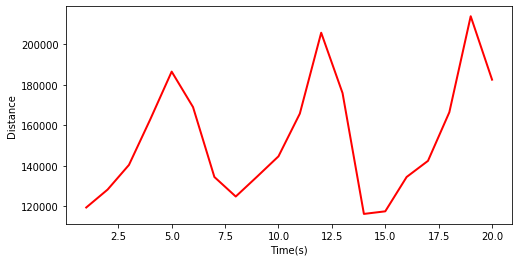

In [21]:
green_date=green_data_origin['lpep_pickup_datetime']

green_date.columns=['lpep_pickup_datetime']
green_date = np.array(green_date)
green_date = pd.to_datetime(green_date) 
green_date_period = green_date.to_period('D')

green_groupbyday=[]
sum_distance = 0
for i in range(1048574):
    if (green_date_period[i]==green_date_period[i+1]):
        sum_distance += green_distance[i]
    else:
        sum_distance += green_distance[i]
        green_groupbyday.append(sum_distance)
        sum_distance=0
x = np.linspace(1, 20, 20)
y = green_groupbyday
plt.figure(figsize=(8,4)) 
plt.plot(x,y,color="red",linewidth=2)
plt.xlabel("Time(s)")
plt.ylabel("Distance")

plt.show()